# 農產品(檸檬)與產地氣候(台中)之比較分析
### 我為何選擇做這項資料分析?
#### 發想:
    曾想做出一個「香蕉選擇權」的專案，其目標是想藉由此方法來使農民的收益變的穩定，但在和蘇老師聊完後，發現要達到--讓農民收入穩定這件事情其實還有更多的方式可以達成，老師那時提出了，如果能找到每塊土地的**天氣狀況**與**農產品產量與售價**的關聯性，再配合天氣的預測，或許可以找到每塊土地年度最適合或收益最高的種植的農作。於是開始了這項資料分析，想試圖找到天氣狀況與農產品產量與售價的相關性。
- 選擇資料:
    - 政府開放平台(台灣地區農產品生產量值)
        - 因為資料雖然通常不會是最新的，但是通常資料為可以直接爬取使用的檔案形式(csv, json)
    - 中央氣象局API
        - 原本想說剛好有API當然要拿來用囉，結果發現爬取下來的資料竟然會ZIP檔，裡面裝著許多.xml檔，經過手動轉檔跟合併後終於變成會使用的python檔了，但可能因為轉檔機設定的問題，雖然轉成json檔，但其資料結構感覺有很多不必要的地方。
  
- 為甚麼是檸檬
    - 其實原本想做的農作是台南當地的水果--芒果，然而芒果的產地在全台灣分配的很廣，然而，我現階段所搜尋到的資料(台灣地區農產品生產量值)又是以全台灣的總和做計算的，於是，我必須找到一種農作物產地是比較集中的，於是在另一份資料(每月盛產農產品產地)中找到了檸檬這個農作，但以後不排除找到各地區農作物的產值以及產量，對產地附近的觀測站觀測到的氣候資訊做分析。

下表為台灣地區農產品生產量值的資料範例，這份報告還有用到另一個資料，但因為資料表較大，所以附在這個repo中而沒有顯示出來。

In [17]:
example_table = [['105', '檸檬', "36289", "31530", "1144195"], ['104', '柳橙', "139494", "19920", "2778717"], ["99", "其他青果類", "32580", "31382", "1022421"]]
example_data = pd.DataFrame(example_table, columns = ['年度', '作物名稱', '產量', '單價', '產值'])
example_data

,年度,作物名稱,產量,單價,產值
0,105,檸檬,36289,31530,1144195
1,104,柳橙,139494,19920,2778717
2,99,其他青果類,32580,31382,1022421


In [19]:
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd

url = 'http://data.coa.gov.tw/Service/OpenData/DataFileService.aspx?UnitId=378'
response = requests.get(url)

f = open('fram_yeild.json', 'w', encoding = 'utf-8')
f.write(response.text)
j = json.loads(response.text)

l_year = []
l_permoney = []
l_money = []
l_weight = []

for i in range (len(j)):
    if (j[i]['作物名稱'] == '檸檬'):
        l_year.append(j[i]['年度'])
        l_permoney.append(j[i]['單價'])
        l_money.append(j[i]['產值'])
        l_weight.append(j[i]['產量'])

l_year.reverse()
l_permoney.reverse()
l_money.reverse()
l_weight.reverse()

for i in range (len(l_permoney)):
    l_permoney[i] = float(l_permoney[i])
    l_money[i] = float(l_money[i])
    l_weight[i] = float(l_weight[i])
    p_permoney[i] = float(p_permoney[i])
    p_money[i] = float(p_money[i])
    pi_permoney[i] = float(pi_permoney[i])
    pi_money[i] = float(pi_money[i])

f = open('all_weather.json', 'r', encoding='utf-8')
j = json.loads(f.read())

Taizhong_per_place_tem = []
Taizhong_per_place_drop = []
Taizhong_per_place_drop_day = []
Taizhong_per_place_sunnyhour = []
Taizhong_per_place_wet = []

# print(j)
def set_blank_list():
    return [0] * 28
# 28 為總共有28個觀測站
for w in range (0,8):
    avg_tem = set_blank_list()
    avg_drop = set_blank_list()
    avg_drop_day = set_blank_list()
    avg_sunnyhour = set_blank_list()
    avg_wet = set_blank_list()
    for i in range (0 + 12 * w, 12 + 12 * w):
        #print(j[0]["cwbopendata"]["dataset"]["time"][i]["dataTime"])
        for k in range (28):
            if(j[0]["cwbopendata"]["dataset"]["time"][i]["dataTime"] == '2013-05'):
                continue
            if(j[0]["cwbopendata"]["dataset"]["time"][i]["dataTime"] == '2014-11'):
                continue
            j[0]["cwbopendata"]["dataset"]["time"][i]["location"][k]["weatherElement"][0]["elementValue"]["value"] = float(j[0]["cwbopendata"]["dataset"]["time"][i]["location"][k]["weatherElement"][0]["elementValue"]["value"])
            avg_tem[k] += j[0]["cwbopendata"]["dataset"]["time"][i]["location"][k]["weatherElement"][0]["elementValue"]["value"]
            if(j[0]["cwbopendata"]["dataset"]["time"][i]["location"][k]["weatherElement"][5]["elementValue"]["value"] == 'T'):
                continue
            else:
                j[0]["cwbopendata"]["dataset"]["time"][i]["location"][k]["weatherElement"][5]["elementValue"]["value"] = float(j[0]["cwbopendata"]["dataset"]["time"][i]["location"][k]["weatherElement"][5]["elementValue"]["value"])
                avg_drop[k] += j[0]["cwbopendata"]["dataset"]["time"][i]["location"][k]["weatherElement"][5]["elementValue"]["value"]       
            j[0]["cwbopendata"]["dataset"]["time"][i]["location"][k]["weatherElement"][17]["elementValue"]["value"] = float(j[0]["cwbopendata"]["dataset"]["time"][i]["location"][k]["weatherElement"][17]["elementValue"]["value"])
            avg_sunnyhour[k] += j[0]["cwbopendata"]["dataset"]["time"][i]["location"][k]["weatherElement"][17]["elementValue"]["value"]
            j[0]["cwbopendata"]["dataset"]["time"][i]["location"][k]["weatherElement"][16]["elementValue"]["value"] = float(j[0]["cwbopendata"]["dataset"]["time"][i]["location"][k]["weatherElement"][16]["elementValue"]["value"])
            avg_drop_day[k] += j[0]["cwbopendata"]["dataset"]["time"][i]["location"][k]["weatherElement"][16]["elementValue"]["value"]
            j[0]["cwbopendata"]["dataset"]["time"][i]["location"][k]["weatherElement"][12]["elementValue"]["value"] = float(j[0]["cwbopendata"]["dataset"]["time"][i]["location"][k]["weatherElement"][12]["elementValue"]["value"])
            avg_wet[k] += j[0]["cwbopendata"]["dataset"]["time"][i]["location"][k]["weatherElement"][12]["elementValue"]["value"]
    for z in range (len(avg_tem)):
        avg_tem[z] = avg_tem[z] / 12
        avg_drop[z] = avg_drop[z] / 12
        avg_sunnyhour[z] = avg_sunnyhour[z] / 12
        avg_drop_day[z] = avg_drop_day[z] / 12
        avg_wet[z] = avg_wet[z] / 12
        if (z == 21):           # 21為台中
            Taizhong_per_place_tem.append(avg_tem[z])
            Taizhong_per_place_drop.append(avg_drop[z])
            Taizhong_per_place_sunnyhour.append(avg_sunnyhour[z])
            Taizhong_per_place_drop_day.append(avg_drop_day[z])
            Taizhong_per_place_wet.append(avg_wet[z])
Taizhong_per_place_tem[4] = Taizhong_per_place_tem[4] * 12 / 11         #以平均值修復資料缺失，因為此年有一個月的資料有缺失
Taizhong_per_place_tem[5] = Taizhong_per_place_tem[5] * 12 / 11         #以平均值修復資料缺失，因為此年有一個月的資料有缺失
Taizhong_per_place_drop[4] = Taizhong_per_place_drop[4] * 12 / 11         #修復資料缺失
Taizhong_per_place_drop[5] = Taizhong_per_place_drop[5] * 12 / 11         #修復資料缺失
Taizhong_per_place_sunnyhour[4] = Taizhong_per_place_sunnyhour[4] * 12 / 11  #修復資料缺失
Taizhong_per_place_sunnyhour[5] = Taizhong_per_place_sunnyhour[5] * 12 / 11  #修復資料缺失
Taizhong_per_place_drop[4] = Taizhong_per_place_drop[4] * 12 / 11     #修復資料缺失
Taizhong_per_place_drop[5] = Taizhong_per_place_drop[5] * 12 / 11     #修復資料缺失
Taizhong_per_place_wet[4] = Taizhong_per_place_wet[4] * 12 / 11     #修復資料缺失
Taizhong_per_place_wet[5] = Taizhong_per_place_wet[5] * 12 / 11     #修復資料缺失
table = [l_money[4:12], l_permoney[4:12], l_weight[4:12], Taizhong_per_place_tem, Taizhong_per_place_drop, Taizhong_per_place_drop_day, Taizhong_per_place_sunnyhour ,Taizhong_per_place_wet]
data = pd.DataFrame(table, index = ['Money', 'Per_money', 'Yeild', 'Temperature', 'Drop', 'Drop_day', 'Sunnyhour', 'Wet'], columns = ['98' ,'99' , '100', '101', '102', '103', '104', '105'])
data





,98,99,100,101,102,103,104,105
Money,299038.000000,449006.000000,671141.000000,724600.000000,1.090194e+06,1.481983e+06,1.402276e+06,1.144195e+06
Per_money,20700.000000,24800.000000,28160.000000,31750.000000,3.536000e+04,4.058000e+04,3.623000e+04,3.153000e+04
Yeild,14446.000000,18105.000000,23833.000000,22822.000000,3.083100e+04,3.652000e+04,3.870500e+04,3.628910e+04
Temperature,23.783333,23.700000,23.508333,23.558333,2.311818e+01,2.268182e+01,2.285000e+01,2.311667e+01
Drop,164.891667,171.200000,100.408333,183.541667,1.262182e+02,1.225785e+02,1.013250e+02,1.553833e+02
Drop_day,7.166667,10.916667,9.083333,11.750000,9.500000e+00,7.833333e+00,8.750000e+00,1.191667e+01
Sunnyhour,154.683333,157.175000,153.508333,149.633333,1.677000e+02,1.682273e+02,1.541417e+02,1.453417e+02
Wet,66.333333,74.666667,71.750000,73.333333,7.518182e+01,7.936364e+01,8.091667e+01,8.133333e+01


下表為個數值互相之間的相關係數。

In [18]:
data.T.corr()

,Money,Per_money,yeild,Temperature,Drop,Drop_day,Sunnyhour,Wet
Money,1.000000,0.946231,0.977067,-0.989928,-0.569119,-0.055613,0.314789,0.864816
Per_money,0.946231,1.000000,0.877623,-0.927487,-0.498902,-0.007718,0.443386,0.763983
yeild,0.977067,0.877623,1.000000,-0.953454,-0.569368,0.051033,0.153722,0.908915
Temperature,-0.989928,-0.927487,-0.953454,1.000000,0.604738,0.173115,-0.402565,-0.825420
Drop,-0.569119,-0.498902,-0.569368,0.604738,1.000000,0.490377,-0.354116,-0.332111
Drop_day,-0.055613,-0.007718,0.051033,0.173115,0.490377,1.000000,-0.539766,0.327885
Sunnyhour,0.314789,0.443386,0.153722,-0.402565,-0.354116,-0.539766,1.000000,0.020384
Wet,0.864816,0.763983,0.908915,-0.825420,-0.332111,0.327885,0.020384,1.000000


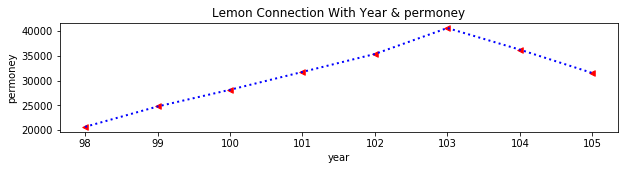

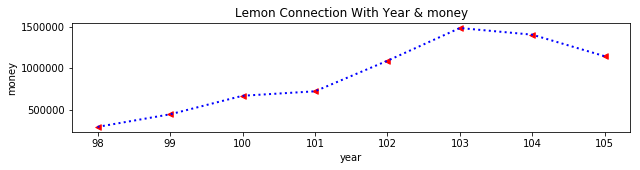

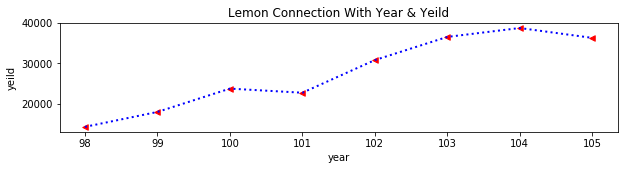

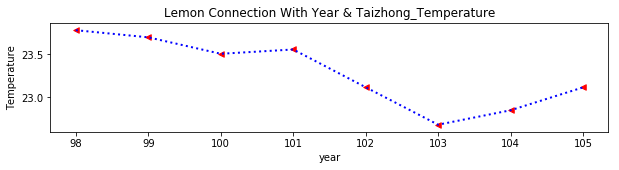

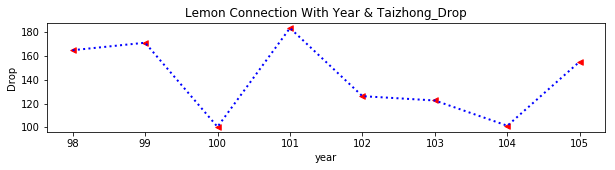

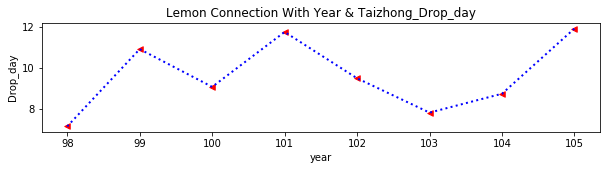

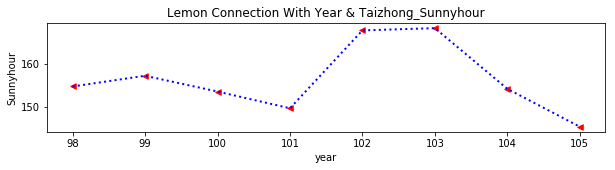

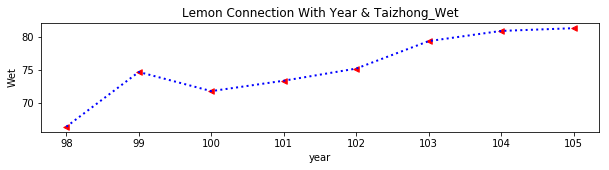

In [6]:
plt.figure(figsize=(10,2))
plt.scatter(l_year[4:12],l_permoney[4:12], s=30, c='red', marker='<')
plt.plot(l_year[4:12], l_permoney[4:12], color='blue', linewidth=2.0, linestyle=':')
plt.xlabel('year')
plt.ylabel('permoney')
plt.title('Lemon Connection With Year & permoney')
plt.show()
plt.figure(figsize=(10,2))
plt.scatter(l_year[4:12],l_money[4:12], s=30, c='red', marker='<')
plt.plot(l_year[4:12], l_money[4:12], color='blue', linewidth=2.0, linestyle=':')
plt.xlabel('year')
plt.ylabel('money')
plt.title('Lemon Connection With Year & money')
plt.show()
plt.figure(figsize=(10,2))
plt.scatter(l_year[4:12],l_weight[4:12], s=30, c='red', marker='<')
plt.plot(l_year[4:12], l_weight[4:12], color='blue', linewidth=2.0, linestyle=':')
plt.xlabel('year')
plt.ylabel('yeild')
plt.title('Lemon Connection With Year & Yeild')
plt.show()
plt.figure(figsize=(10,2))
plt.scatter(l_year[4:12],Taizhong_per_place_tem, s=30, c='red', marker='<')
plt.plot(l_year[4:12], Taizhong_per_place_tem, color='blue', linewidth=2.0, linestyle=':')
plt.xlabel('year')
plt.ylabel('Temperature')
plt.title('Lemon Connection With Year & Taizhong_Temperature')
plt.show()
plt.figure(figsize=(10,2))
plt.scatter(l_year[4:12],Taizhong_per_place_drop, s=30, c='red', marker='<')
plt.plot(l_year[4:12], Taizhong_per_place_drop, color='blue', linewidth=2.0, linestyle=':')
plt.xlabel('year')
plt.ylabel('Drop')
plt.title('Lemon Connection With Year & Taizhong_Drop')
plt.show()
plt.figure(figsize=(10,2))
plt.scatter(l_year[4:12],Taizhong_per_place_drop_day, s=30, c='red', marker='<')
plt.plot(l_year[4:12], Taizhong_per_place_drop_day, color='blue', linewidth=2.0, linestyle=':')
plt.xlabel('year')
plt.ylabel('Drop_day')
plt.title('Lemon Connection With Year & Taizhong_Drop_day')
plt.show()
plt.figure(figsize=(10,2))
plt.scatter(l_year[4:12],Taizhong_per_place_sunnyhour, s=30, c='red', marker='<')
plt.plot(l_year[4:12], Taizhong_per_place_sunnyhour, color='blue', linewidth=2.0, linestyle=':')
plt.xlabel('year')
plt.ylabel('Sunnyhour')
plt.title('Lemon Connection With Year & Taizhong_Sunnyhour')
plt.show()
plt.figure(figsize=(10,2))
plt.scatter(l_year[4:12],Taizhong_per_place_wet, s=30, c='red', marker='<')
plt.plot(l_year[4:12], Taizhong_per_place_wet, color='blue', linewidth=2.0, linestyle=':')
plt.xlabel('year')
plt.ylabel('Wet')
plt.title('Lemon Connection With Year & Taizhong_Wet')
plt.show()

## 從中找到了甚麼關聯?
- 相關係數
    - 溫度
        - 溫度與產值、產量、單價都有高度的負相關，亦即溫度有可能是影響檸檬收益的關鍵之一。
    - 濕度
        - 濕度與產值、產量、單價都有高度的正相關，亦即溫度有可能是影響檸檬收益的關鍵之一。
然而，檸檬的產值是明顯的往上提升，會不會只是因為其他我們未考量到的外在因素，而溫度也只是剛好這幾年平均下降了，濕度剛好這幾年平均上升了，而造成似乎找到了兩個高度相關的因素呢。
    
### 挑戰
- 資料不夠細
     - 在中央氣象局的官網其實是有每個觀測站的資料的，但在中央氣象局的API中卻沒有這項資料，以致於所用氣象站的位置可能離產地是有距離的導致分析結果產生誤差。
     - 這份資料只有提出總產量，但卻沒有提出單位土地面積的產量，所以我們只能在假設土地種植面積沒有改變的前提下去做分析。
     - 農產品產地如果不只一處就須分別分析各產地與其天氣之相關，但這份資料為的農作物產量為全國的總和，看不出各地分別農產品產量，以至於這份資料所可選取的農作物是有侷限的，但若能拿到各區農產品的產值資料即可解決此問題。
- 未考慮其他外在因素
    - 通貨膨脹
        - 這幾年通膨影響，物價上升為自然現象是這份資料沒有考量的
    - 農作技術提升
        - 農作物耕種技術及經驗的提升，亦是這份資料未考量的

### 想解決的問題解決了嗎?
雖然從資料中可以看到**溫度**與產量、單價、產值都呈現高度負相關，我們可以知道的是在這塊土地上，溫度可能是影響產量的因素，那我們可以控制溫度嗎?如果不行的話，那我們可以找其他種類的農作來這個地方耕種嗎?其他種類的農作適合這邊的土壤酸鹼、海拔高度嗎、迎風面or背風面嗎?那換一種角度想，針對同一區塊的土地，不同種類的農作來試試看，(不考慮檸檬樹可能要砍掉、當地農民僅懂檸檬耕種技術)會不會是一個可以提高收益的方式呢?能分析的方式太多，不像是許多資訊問題可以直接在電腦上作測試，或許應該找到一個更了解農作習性的人，他們會比較容易找到關鍵因素。
